# Objectives
1. Import data 
  - 1.1 Import dasta from flat file
  - 1.2 Import date from API 
  - 1.3 Parse JSON data 
2. Create DataFrame
3. Cleaning data: 
  - 3.1 Deal with Nan and duplicates 
  - 3.1 Subsetting and sorting 
  - 3.2 Adding new columns
4. Summary statistics
  - 4.1 Aggregating data 
  - 4.2 Grouping and 
  - 4.3 Pivot table 
  - 4.4 Subsetting data
  - 4.5 Indexing and filtering data

## 1. Import data

### 1.1 Read CSV file

In [ ]:
# From previous steps
# header=None: column names are passed explicitly; header=0 to be able to replace existing names.
# delimiterstr= ',' ';''\t'
# names: List of column names to use
# narows = 5 - read the first 5 rows
# comment ='#' takes characters that comments occur after in the file
# na_values = 'Nothing', takes a list of strings to recognize as NA/NaN
# index_col=False can be used to force pandas to not use the first column as the index
# usecols return a subset of the columns
# dtype = {‘a’: np.float64, ‘b’: np.int32, ‘c’: ‘Int64’}
# skiprows: int or list
# parse_dates: bool or list of int or names or list of lists or dict, default False
airline_bumping = pd.read_csv("airline_bumping.csv", index_col = False)
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

In [ ]:
  airline  year  nb_bumped  total_passengers
    0    DELTA AIR LINES  2017        679          99796155
    1     VIRGIN AMERICA  2017        165           6090029
    2    JETBLUE AIRWAYS  2017       1475          27255038
    3    UNITED AIRLINES  2017       2067          70030765
    4  HAWAIIAN AIRLINES  2017         92           8422734
                         nb_bumped  total_passengers  bumps_per_10k
    airline                                                        
    ALASKA AIRLINES           1392          36543121          0.381
    AMERICAN AIRLINES        11115         197365225          0.563
    DELTA AIR LINES           1591         197033215          0.081
    EXPRESSJET AIRLINES       3326          27858678          1.194
    FRONTIER AIRLINES         1228          22954995          0.535
    HAWAIIAN AIRLINES          122          16577572          0.074
    JETBLUE AIRWAYS           3615          53245866          0.679
    SKYWEST AIRLINES          3094          47091737          0.657
    SOUTHWEST AIRLINES       18585         228142036          0.815
    SPIRIT AIRLINES           2920          32304571          0.904
    UNITED AIRLINES           4941         134468897          0.367
    VIRGIN AMERICA             242          12017967          0.201

In [ ]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values('bumps_per_10k',ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")

In [ ]:
 nb_bumped  total_passengers  bumps_per_10k
airline                                                        
EXPRESSJET AIRLINES       3326          27858678          1.194
SPIRIT AIRLINES           2920          32304571          0.904
SOUTHWEST AIRLINES       18585         228142036          0.815
JETBLUE AIRWAYS           3615          53245866          0.679
SKYWEST AIRLINES          3094          47091737          0.657
AMERICAN AIRLINES        11115         197365225          0.563
FRONTIER AIRLINES         1228          22954995          0.535
ALASKA AIRLINES           1392          36543121          0.381
UNITED AIRLINES           4941         134468897          0.367
VIRGIN AMERICA             242          12017967          0.201
DELTA AIR LINES           1591         197033215          0.081
HAWAIIAN AIRLINES          122          16577572          0.074

### 1.2 Import data from IPA

**Importing flat files from the web**

In [1]:
# Import package
from urllib.request import urlretrieve
import pandas as pd

# Assign url of file: url
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Send requests and meanwhile save file locally
urlretrieve(url,'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

**Opening and reading flat files from the web**

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

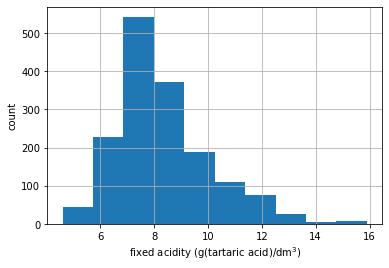

In [2]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url,sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
df.iloc[:, 0].hist()
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

**Importing non-flat files from the web**

In [3]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xls
xls = pd.read_excel(url,sheet_name=None)

# Print the sheetnames to the shell
print(xls.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xls['1700'].head())

dict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


**Performing HTTP requests in Python using urllib**

In [4]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()

<class 'http.client.HTTPResponse'>


In [5]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

b'<!doctype html><html lang="en"><head><link rel="apple-touch-icon-precomposed" sizes="57x57" href="/campus/apple-touch-icon-57x57.png"><link rel="apple-touch-icon-precomposed" sizes="114x114" href="/campus/apple-touch-icon-114x114.png"><link rel="apple-touch-icon-precomposed" sizes="72x72" href="/campus/apple-touch-icon-72x72.png"><link rel="apple-touch-icon-precomposed" sizes="144x144" href="/campus/apple-touch-icon-144x144.png"><link rel="apple-touch-icon-precomposed" sizes="60x60" href="/campus/apple-touch-icon-60x60.png"><link rel="apple-touch-icon-precomposed" sizes="120x120" href="/campus/apple-touch-icon-120x120.png"><link rel="apple-touch-icon-precomposed" sizes="76x76" href="/campus/apple-touch-icon-76x76.png"><link rel="apple-touch-icon-precomposed" sizes="152x152" href="/campus/apple-touch-icon-152x152.png"><link rel="icon" type="image/png" href="/campus/favicon.ico"><link rel="icon" type="image/png" href="/campus/favicon-196x196.png" sizes="196x196"><link rel="icon" type="

**Performing HTTP requests in Python using requests**

In [7]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)

<!DOCTYPE html>
<html lang="en-US">
<head>
    <title>Just a moment...</title>
    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=Edge">
    <meta name="robots" content="noindex,nofollow">
    <meta name="viewport" content="width=device-width,initial-scale=1">
    <link href="/cdn-cgi/styles/challenges.css" rel="stylesheet">
    <meta http-equiv="refresh" content="35">

</head>
<body class="no-js">
    <div class="main-wrapper" role="main">
    <div class="main-content">
        <h1 class="zone-name-title h1">
            <img class="heading-favicon" src="/favicon.ico"
                 onerror="this.onerror=null;this.parentNode.removeChild(this)">
            www.datacamp.com
        </h1>
        <h2 class="h2" id="challenge-running">
            Checking if the site connection is secure
        </h2>
        <noscript>
            <div id="challenge-error-title">
                <div class="h2">
                 

**Parsing HTML with BeautifulSoup**

In [ ]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc=r.text

# Create a BeautifulSoup object from the HTML: soup
soup=BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

In [ ]:
<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <!-- Built from main -->
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
   <h3>
    <a href="images/df20000406.jpg">
     Who I Am
    </a>
   </h3>
   <p>
    Read
my
    <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
     "King's
Day Speech"
    </a>
    for some inspiration.
    <p>
     I am the author of the
     <a href="http://www.python.org">
      Python
     </a>
     programming language.  See also my
     <a href="Resume.html">
      resume
     </a>
     and my
     <a href="Publications.html">
      publications list
     </a>
     , a
     <a href="bio.html">
      brief bio
     </a>
     , assorted
     <a href="http://legacy.python.org/doc/essays/">
      writings
     </a>
     ,
     <a href="http://legacy.python.org/doc/essays/ppt/">
      presentations
     </a>
     and
     <a href="interviews.html">
      interviews
     </a>
     (all about Python), some
     <a href="pics.html">
      pictures of me
     </a>
     ,
     <a href="http://neopythonic.blogspot.com">
      my new blog
     </a>
     , and
my
     <a href="http://www.artima.com/weblogs/index.jsp?blogger=12088">
      old
blog
     </a>
     on Artima.com.  I am
     <a href="https://twitter.com/gvanrossum">
      @gvanrossum
     </a>
     on Twitter.
     <p>
      I am currently a Distinguished Engineer at Microsoft.
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my
      <a href="Resume.html">
       resume
      </a>
      .)  I created Python while at CWI.
      <h3>
       How to Reach Me
      </h3>
      <p>
       You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.
       <h3>
        My Name
       </h3>
       <p>
        My name often poses difficulties for Americans.
        <p>
         <b>
          Pronunciation:
         </b>
         in Dutch, the "G" in Guido is a hard G,
pronounced roughly like the "ch" in Scottish "loch".  (Listen to the
         <a href="guido.au">
          sound clip
         </a>
         .)  However, if you're
American, you may also pronounce it as the Italian "Guido".  I'm not
too worried about the associations with mob assassins that some people
have. :-)
         <p>
          <b>
           Spelling:
          </b>
          my last name is two words, and I'd like to keep it
that way, the spelling on some of my credit cards notwithstanding.
Dutch spelling rules dictate that when used in combination with my
first name, "van" is not capitalized: "Guido van Rossum".  But when my
last name is used alone to refer to me, it is capitalized, for
example: "As usual, Van Rossum was right."
          <p>
           <b>
            Alphabetization:
           </b>
           in America, I show up in the alphabet under
"V".  But in Europe, I show up under "R".  And some of my friends put
me under "G" in their address book...
           <h3>
            More Hyperlinks
           </h3>
           <ul>
            <li>
             Here's a collection of
             <a href="http://legacy.python.org/doc/essays/">
              essays
             </a>
             relating to Python
that I've written, including the foreword I wrote for Mark Lutz' book
"Programming Python".
             <p>
              <li>
               I own the official
               <a href="images/license.jpg">
                <img align="center" border="0" height="75" src="images/license_thumb.jpg" width="100"/>
                Python license.
               </a>
               <p>
               </p>
              </li>
             </p>
            </li>
           </ul>
           <h3>
            The Audio File Formats FAQ
           </h3>
           <p>
            I was the original creator and maintainer of the Audio File Formats
FAQ.  It is now maintained by Chris Bagwell
at
            <a href="http://www.cnpbagwell.com/audio-faq">
             http://www.cnpbagwell.com/audio-faq
            </a>
            .  And here is a link to
            <a href="http://sox.sourceforge.net/">
             SOX
            </a>
            , to which I contributed
some early code.
            <hr/>
            <a href="images/internetdog.gif">
             "On the Internet, nobody knows you're
a dog."
            </a>
            <hr/>
           </p>
          </p>
         </p>
        </p>
       </p>
      </p>
     </p>
    </p>
   </p>
  </p>
 </body>
</html>

### 1.3 Parse JSON data 

In [ ]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.get_text()

# Print Guido's text to the shell
print(guido_text)

In [ ]:
<title>Guido's Personal Home Page</title>


Guido's Personal Home Page


Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am currently a Distinguished Engineer at Microsoft.
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

My Name
My name often poses difficulties for Americans.

Pronunciation: in Dutch, the "G" in Guido is a hard G,
pronounced roughly like the "ch" in Scottish "loch".  (Listen to the
sound clip.)  However, if you're
American, you may also pronounce it as the Italian "Guido".  I'm not
too worried about the associations with mob assassins that some people
have. :-)

Spelling: my last name is two words, and I'd like to keep it
that way, the spelling on some of my credit cards notwithstanding.
Dutch spelling rules dictate that when used in combination with my
first name, "van" is not capitalized: "Guido van Rossum".  But when my
last name is used alone to refer to me, it is capitalized, for
example: "As usual, Van Rossum was right."

Alphabetization: in America, I show up in the alphabet under
"V".  But in Europe, I show up under "R".  And some of my friends put
me under "G" in their address book...


More Hyperlinks

Here's a collection of essays relating to Python
that I've written, including the foreword I wrote for Mark Lutz' book
"Programming Python".
I own the official 
Python license.

The Audio File Formats FAQ
I was the original creator and maintainer of the Audio File Formats
FAQ.  It is now maintained by Chris Bagwell
at http://www.cnpbagwell.com/audio-faq.  And here is a link to
SOX, to which I contributed
some early code.



"On the Internet, nobody knows you're
a dog."

**API and JSON**

In [ ]:
# Load JSON: json_data
with open("a_movie.json") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

In [10]:
# Import requests package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin, Ben Mezrich","Actors":"Jesse Eisenberg, Andrew Garfield, Justin Timberlake","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"United States","Awards":"Won 3 Oscars. 173 wins & 186 nominations total","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.8/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.8","imdbVotes":"705,941","imdbID":"tt1285016","Type":"movie","DV

In [11]:
# Import package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin, Ben Mezrich
Actors:  Jesse Eisenberg, Andrew Garfield, Justin Timberlake
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  United States
Awards:  Won 3 Oscars. 173 wins & 186 nominations total
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.8
imdbVotes:  705,941
imdbID:  tt1285016
Type:  movie
DVD:  11 Jan 2011
BoxOffice:  $

In [ ]:
# Import package
import requests

# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

In [ ]:
<link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r1033289096">
<p class="mw-empty-elt">
</p>
<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="it-Latn-fonipa">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nap-Latn-fonipa">[ˈpittsə]</span>) is a dish of  Italian origin consisting of a usually round, flat base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as various types of sausage, anchovies, mushrooms, onions, olives, vegetables, meat, ham, etc.), which is then baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta. A person who makes pizza is known as a <b>pizzaiolo</b>.
</p><p>In Italy, pizza served in a restaurant is presented unsliced, and is eaten with the use of a knife and fork. In casual settings, however, it is cut into wedges to be eaten while held in the hand.
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pizza was invented in Naples, and the dish and its variants have since become popular in many countries. It has become one of the most popular foods in the world and a common fast food item in Europe, North America and Australasia; available at pizzerias (restaurants specializing in pizza),  restaurants offering Mediterranean cuisine, via pizza delivery, and as street food. Various food companies sell ready-baked pizzas, which may be frozen, in grocery stores, to be reheated in a home oven.
</p><p>In 2017, the world pizza market was US$128 billion, and in the US it was $44 billion spread over 76,000 pizzerias.  Overall, 13% of the U.S. population aged 2 years and over consumed pizza on any given day.</p><p>The <i>Associazione Verace Pizza Napoletana</i> (lit. True Neapolitan Pizza Association) is a non-profit organization founded in 1984 with headquarters in Naples that aims to promote traditional Neapolitan pizza. In 2009, upon Italy's request, Neapolitan pizza was registered with the European Union as a Traditional Speciality Guaranteed dish, and in 2017 the art of its making was included on UNESCO's list of intangible cultural heritage.</p><p>Raffaele Esposito is often considered to be the father of modern pizza.</p>

## 2. Create dataframe

In [ ]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': '2019-11-03', 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': '2019-11-10', 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

In [ ]:
         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348

In [ ]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ['2019-11-17','2019-12-01'],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

In [ ]:
date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096

## 3. Cleaning data

### 3.1 Deal with Nan and duplicates

In [ ]:
# Find and drop duplicates 
duplicates = sales.duplicated(subset=['store', 'type'], keep=False)
store_types = sales.drop_duplicates(['store','type'])

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(['store','department'])

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday']==True].drop_duplicates('date')

# Print date col of holiday_dates
print(holiday_dates['date'])

# Assert duplicates are processed
assert duplicates.shape[0] == 0

In [ ]:
498    2010-09-10
691    2011-11-25
2315   2010-02-12
6735   2012-09-07
6810   2010-12-31
6815   2012-02-10
6820   2011-09-09
Name: date, dtype: datetime64

In [ ]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='age')
msno.matrix(banking_sorted)
plt.show()

In [ ]:
cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64

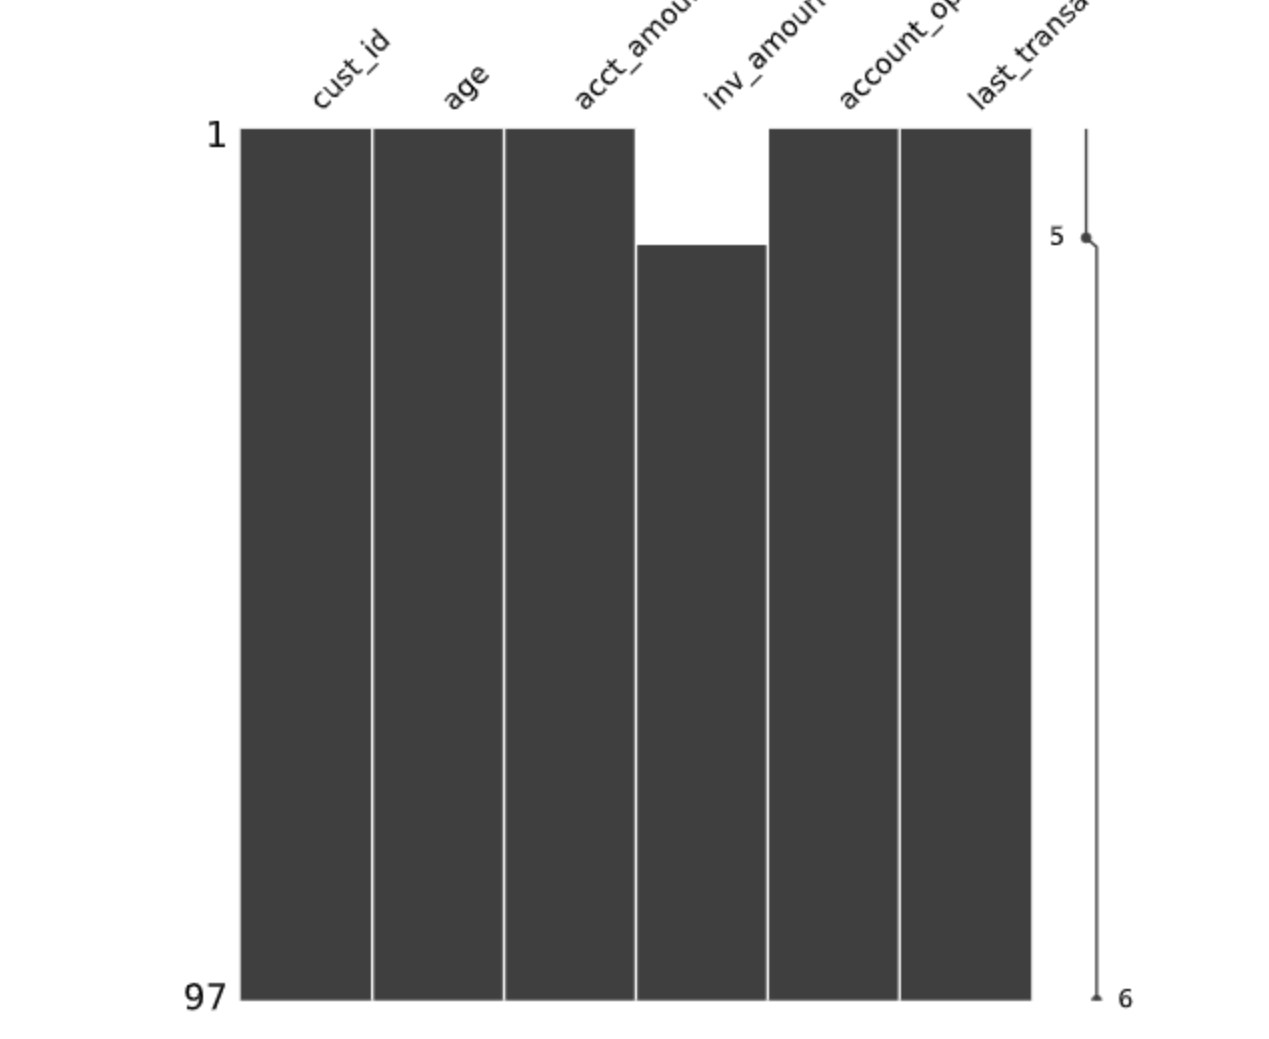

In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

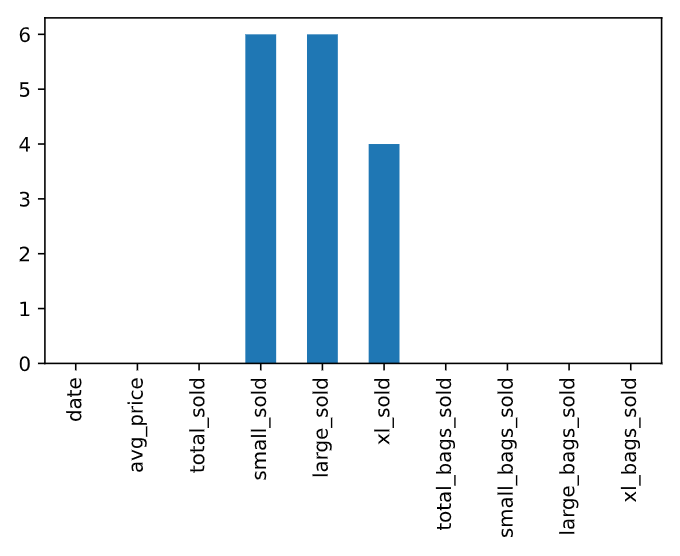

In [ ]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

In [ ]:
date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool

In [ ]:
# Pandas provides basic plotting 

# Display pandas histogram
df['Award_Amount'].plot.hist()
plt.show()

# Clear out the pandas histogram
plt.clf()

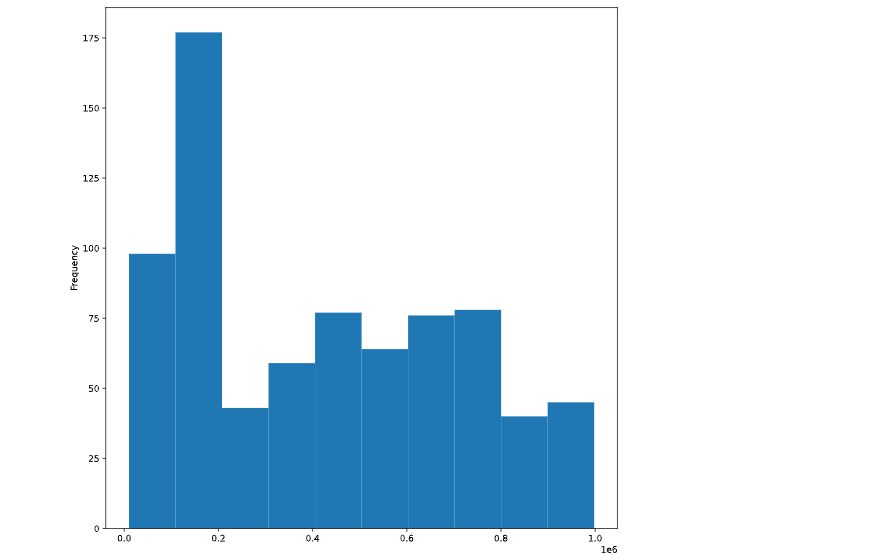

In [ ]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()

# Show the plot
plt.show()

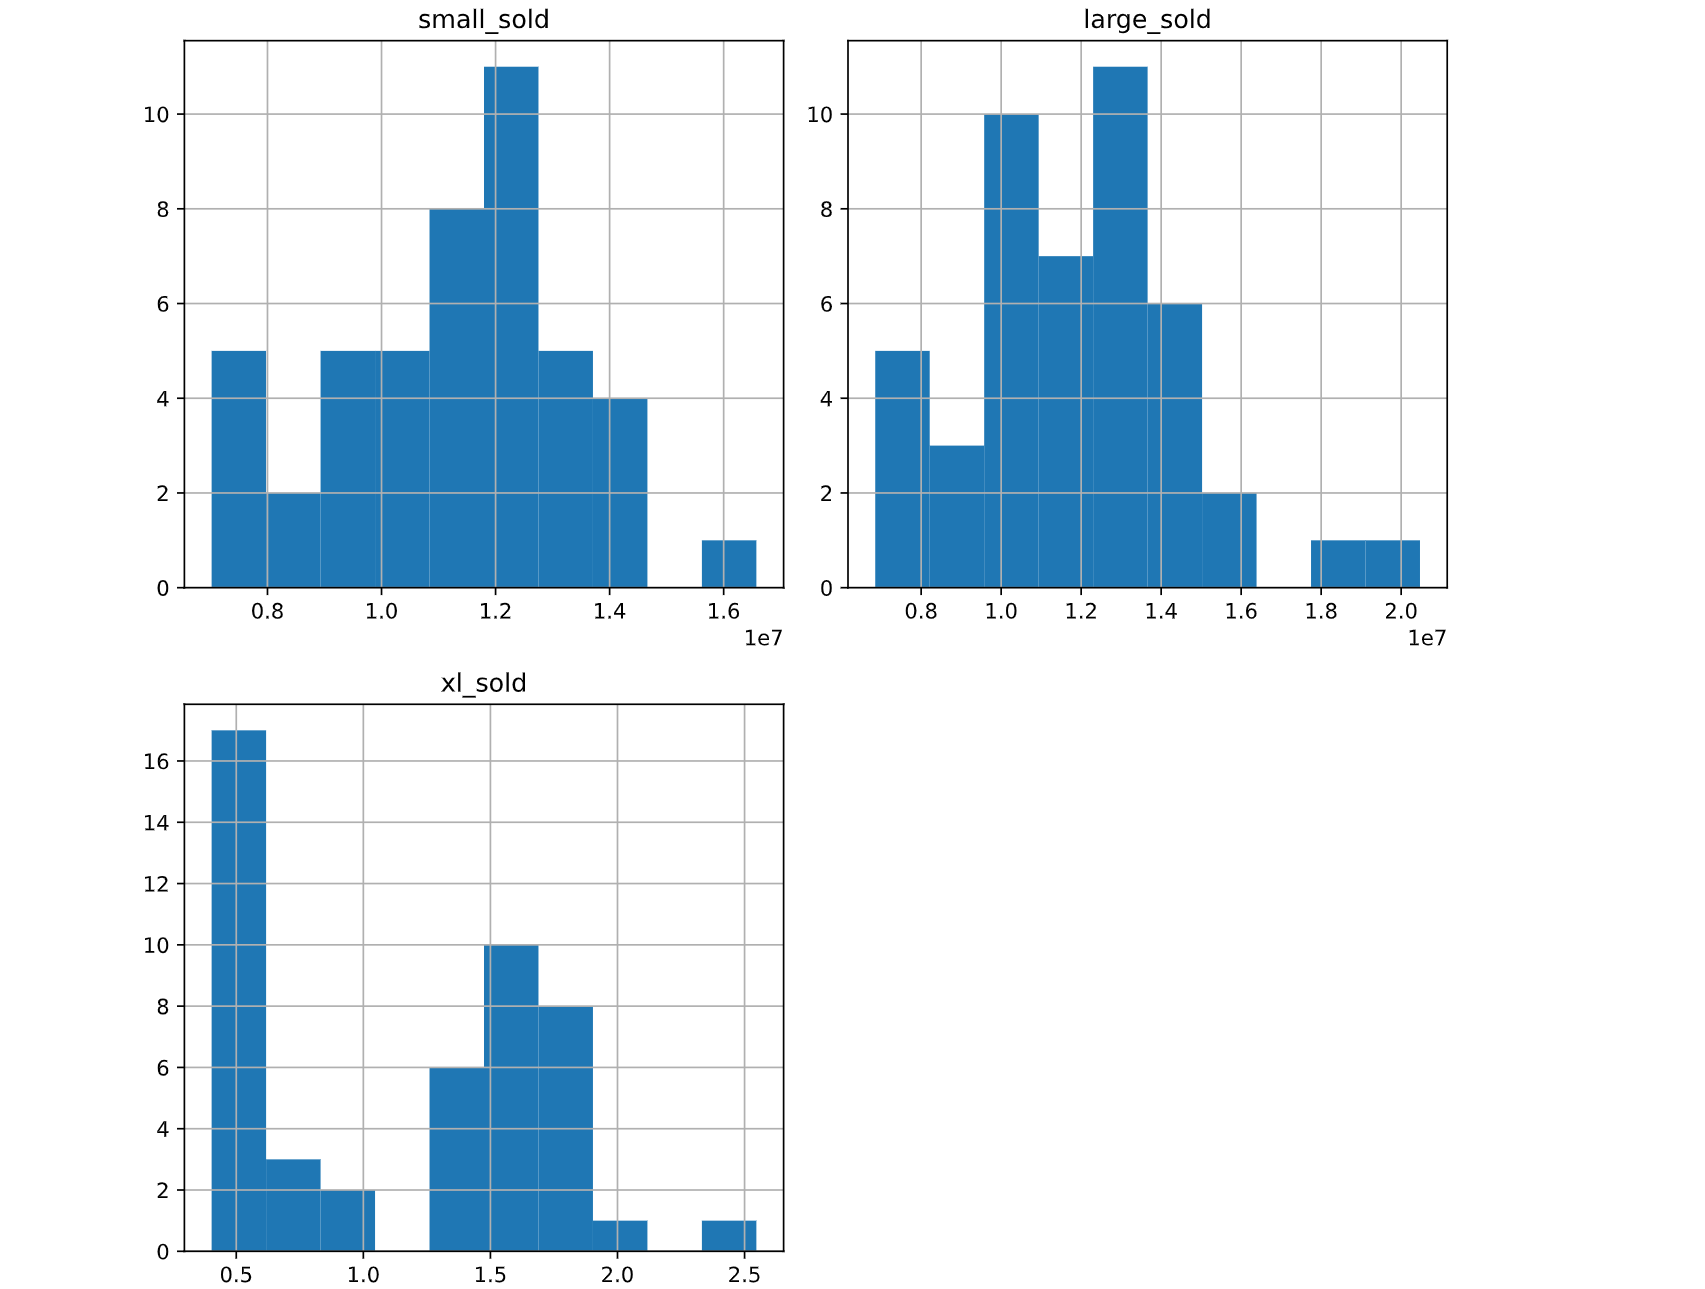

### 3.2 Transforming DataFrame

In [ ]:
homelessness.head()

In [ ]:
     region       state  individuals  family_members  state_pop
0  East South Central     Alabama       2570.0           864.0    4887681
1             Pacific      Alaska       1434.0           582.0     735139
2            Mountain     Arizona       7259.0          2606.0    7158024
3  West South Central    Arkansas       2280.0           432.0    3009733
4             Pacific  California     109008.0         20964.0   39461588

In [ ]:
homelessness.shape

In [ ]:
(51,6)

### 3.3 Adding new columns

In [ ]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness['individuals']/homelessness['state_pop']
homelessness.head()

In [ ]:
# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness['indiv_per_10k']>=20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values(by="indiv_per_10k",ascending = False)

high_homelessness_str.head()

In [ ]:
  region                 state  individuals  family_members  state_pop  indiv_per_10k
8   South Atlantic  District of Columbia       3770.0          3134.0     701547         53.738
11         Pacific                Hawaii       4131.0          2399.0    1420593         29.079
4          Pacific            California     109008.0         20964.0   39461588         27.624
37         Pacific                Oregon      11139.0          3337.0    4181886         26.636
28        Mountain                Nevada       7058.0           486.0    3027341         23.314

In [ ]:
# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state','indiv_per_10k']]

# See the result
print(result)

In [ ]:
                   state  indiv_per_10k
8   District of Columbia         53.738
11                Hawaii         29.079
4             California         27.624
37                Oregon         26.636
28                Nevada         23.314
47            Washington         21.829
32              New York         20.392

In [ ]:
# Adding new column
"""for lab, row in homelessness.iterrows():
    homelessness.loc[lab, 'state_length'] = len(row['state'])"""
    
homelessness['state_new'] = homelessness['state'].apply(str.upper)

In [ ]:
# change column name 
df = homelessness.rename(columns={'region': 'reg', 'state': 'st'}, replace = True)

## 4. Summary statistics

### 4.1 Aggregating data

In [ ]:
# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

In [ ]:
 store type  department       date  weekly_sales  is_holiday  temperature_c  fuel_price_usd_per_l  unemployment
0      1    A           1 2010-02-05      24924.50       False          5.728                 0.679         8.106
1      1    A           1 2010-03-05      21827.90       False          8.056                 0.693         8.106
2      1    A           1 2010-04-02      57258.43       False         16.817                 0.718         7.808
3      1    A           1 2010-05-07      17413.94       False         22.528                 0.749         7.808
4      1    A           1 2010-06-04      17558.09       False         27.050                 0.715         7.808
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
    
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   store                 10774 non-null  int64         
 1   type                  10774 non-null  object        
 2   department            10774 non-null  int32         
 3   date                  10774 non-null  datetime64[ns]
 4   weekly_sales          10774 non-null  float64       
 5   is_holiday            10774 non-null  bool          
 6   temperature_c         10774 non-null  float64       
 7   fuel_price_usd_per_l  10774 non-null  float64       
 8   unemployment          10774 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int32(1), int64(1), object(1)
memory usage: 641.9+ KB

In [ ]:
# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales['weekly_sales'].median())

# Print the maximum of the date column
print(sales['date'].max())

# Print the minimum of the date column
print(sales['date'].min())

In [ ]:
23843.95014850566
12049.064999999999
2012-10-26 00:00:00
2010-02-05 00:00:00

In [ ]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

In [ ]:
16.583333333333336

In [ ]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales']=sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

In [ ]:
         date  weekly_sales  cum_weekly_sales  cum_max_sales
0  2010-02-05      24924.50          24924.50       24924.50
1  2010-03-05      21827.90          46752.40       24924.50
2  2010-04-02      57258.43         104010.83       57258.43
3  2010-05-07      17413.94         121424.77       57258.43
4  2010-06-04      17558.09         138982.86       57258.43
5  2010-07-02      16333.14         155316.00       57258.43
6  2010-08-06      17508.41         172824.41       57258.43
7  2010-09-03      16241.78         189066.19       57258.43
8  2010-10-01      20094.19         209160.38       57258.43
9  2010-11-05      34238.88         243399.26       57258.43
10 2010-12-03      22517.56         265916.82       57258.43
11 2011-01-07      15984.24         281901.06       57258.43

In [ ]:
# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
print(store_counts)

# Get the proportion of stores of each type 
# If Normalize is True then the object returned will contain the relative frequencies of the unique values.
store_props = store_types['type'].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts['department'].value_counts(sort = True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts['department'].value_counts(sort=True, ascending=False, normalize=True)
print(dept_props_sorted)

In [ ]:
A    11
B     1
Name: type, dtype: int64
A    0.917
B    0.083
Name: type, dtype: float64
1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64
1     0.013
55    0.013
72    0.013
71    0.013
67    0.013
      ...  
37    0.011
48    0.009
50    0.006
39    0.004
43    0.002
Name: department, Length: 80, dtype: float64

In [ ]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

In [ ]:
type
A    0.91
B    0.09
Name: weekly_sales, dtype: float64

### 4.2 Grouping data

In [ ]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min, np.max,np.mean,np.median])
"""sales_stats_1 = sales.groupby('type').agg({'weekly_sales':'min'})"""
"""sales_stats_1 = sales.groupby('type')['weekly_sales'].agg(['min','max'])"""

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')['unemployment','fuel_price_usd_per_l'].agg([np.min,np.max,np.mean,np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

In [ ]:
 amin       amax       mean    median
type                                        
A    -1098.0  293966.05  23674.667  11943.92
B     -798.0  232558.51  25696.678  13336.08


     unemployment                      fuel_price_usd_per_l                     
             amin   amax   mean median                 amin   amax   mean median
type                                                                            
A           3.879  8.992  7.973  8.067                0.664  1.107  0.745  0.735
B           7.170  9.765  9.279  9.199                0.760  1.108  0.806  0.803


In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()
print(nb_sold_by_size)

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

In [ ]:
date          type  year  avg_price   size    nb_sold
0  2015-12-27  conventional  2015       0.95  small  9.627e+06
1  2015-12-20  conventional  2015       0.98  small  8.710e+06
2  2015-12-13  conventional  2015       0.93  small  9.855e+06
3  2015-12-06  conventional  2015       0.89  small  9.405e+06
4  2015-11-29  conventional  2015       0.99  small  8.095e+06

size
extra_large    1.562e+08
large          2.015e+09
small          2.055e+09
Name: nb_sold, dtype: float64

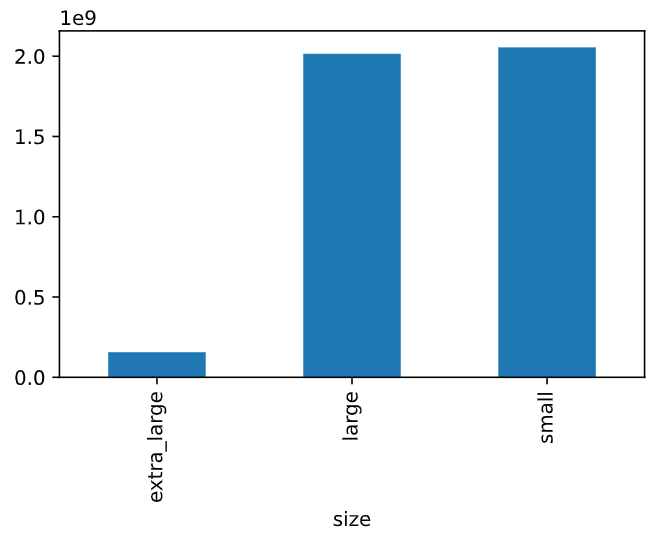

In [ ]:
# Histogram of conventional avg_price 
avocados[avocados['type']=='conventional']['avg_price'].hist(alpha=0.5)

# Histogram of organic avg_price
avocados[avocados['type']=='organic']['avg_price'].hist(alpha=0.5)

# Add a legend
plt.legend(['conventional','organic'])

# Show the plot
plt.show()

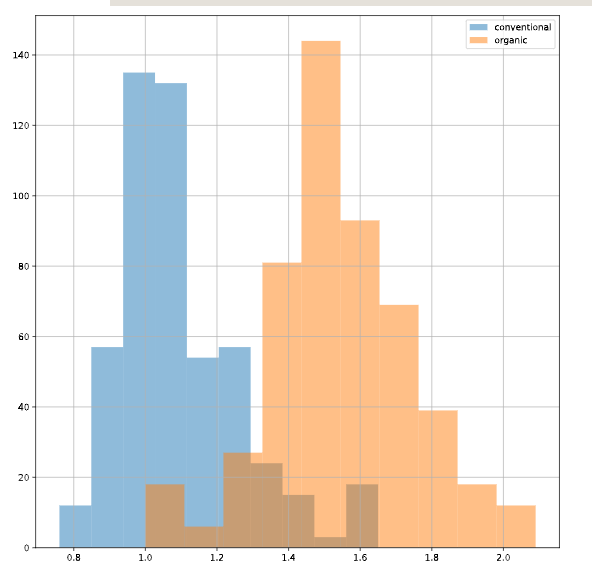

### 4.3 Pivot table

In [ ]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values = 'weekly_sales',index='type')

# Print mean_sales_by_type
print(mean_sales_by_type)

In [ ]:
      weekly_sales
type              
A        23674.667
B        25696.678

In [ ]:
# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values = 'weekly_sales', index = 'type', aggfunc= ['mean','median'])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

In [ ]:
             mean       median
     weekly_sales weekly_sales
type                          
A       23674.667     11943.92
B       25696.678     13336.08

In [ ]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values = 'weekly_sales', index='type', columns = 'is_holiday')

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

In [ ]:
is_holiday      False     True
type                          
A           23768.584  590.045
B           25751.981  810.705

In [ ]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values='weekly_sales',index='department',columns='type',fill_value=0))

In [ ]:
type                 A           B
department                        
1            30961.725   44050.627
2            67600.159  112958.527
3            17160.003   30580.655
4            44285.399   51219.654
5            34821.011   63236.875
...                ...         ...
95          123933.787   77082.102
96           21367.043    9528.538
97           28471.267    5828.873
98           12875.423     217.428
99             379.124       0.000

In [ ]:
# Add a year column to temperatures
temperatures['year'] = temperatures['date'].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values='avg_temp_c',index=['country','city'],columns = 'year')
print(temp_by_country_city_vs_year)

In [ ]:
year                              2000    2001    2002    2003    2004  ...    2009    2010    2011    2012    2013
country       city                                                      ...                                        
Afghanistan   Kabul             15.823  15.848  15.715  15.133  16.128  ...  15.093  15.676  15.812  14.510  16.206
Angola        Luanda            24.410  24.427  24.791  24.867  24.216  ...  24.325  24.440  24.151  24.240  24.554
Australia     Melbourne         14.320  14.180  14.076  13.986  13.742  ...  14.647  14.232  14.191  14.269  14.742
              Sydney            17.567  17.854  17.734  17.592  17.870  ...  18.176  17.999  17.713  17.474  18.090
Bangladesh    Dhaka             25.905  25.931  26.095  25.927  26.136  ...  26.536  26.648  25.803  26.284  26.587
...                                ...     ...     ...     ...     ...  ...     ...     ...     ...     ...     ...
United States Chicago           11.090  11.703  11.532  10.482  10.943  ...  10.298  11.816  11.214  12.821  11.587
              Los Angeles       16.643  16.466  16.430  16.945  16.553  ...  16.677  15.887  15.875  17.090  18.121
              New York           9.969  10.931  11.252   9.836  10.389  ...  10.142  11.358  11.272  11.971  12.164
Vietnam       Ho Chi Minh City  27.589  27.832  28.065  27.828  27.687  ...  27.853  28.282  27.675  28.249  28.455
Zimbabwe      Harare            20.284  20.861  21.079  20.889  20.308  ...  20.524  21.166  20.782  20.523  19.756

[100 rows x 14 columns]

### 4.4 Subsetting data

In [ ]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc['Egypt':'India']

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi')]

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi'),'2005':'2010']

In [ ]:
year                    2005    2006    2007    2008    2009    2010
country  city                                                       
Egypt    Cairo        22.006  22.050  22.361  22.644  22.625  23.718
         Gizeh        22.006  22.050  22.361  22.644  22.625  23.718
Ethiopia Addis Abeba  18.313  18.427  18.143  18.165  18.765  18.298
France   Paris        11.553  11.788  11.751  11.278  11.464  10.410
Germany  Berlin        9.919  10.545  10.883  10.658  10.062   8.607
India    Ahmadabad    26.828  27.283  27.511  27.049  28.096  28.018
         Bangalore    25.477  25.418  25.464  25.353  25.726  25.705
         Bombay       27.036  27.382  27.635  27.178  27.845  27.765
         Calcutta     26.729  26.986  26.585  26.522  27.153  27.289
         Delhi        25.716  26.366  26.146  25.675  26.554  26.520

In [ ]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year==mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis='columns')

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city==mean_temp_by_city.min()])

In [ ]:
year
2013    20.312
dtype: float64

country  city  
China    Harbin    4.877
dtype: float64

### 3.5 Indexing and filtering data

In [ ]:
# Look at temperatures
print(temperatures.head())

# Set the index of temperatures to city
temperatures_ind = temperatures.set_index('city')
print(temperatures_ind.head())

In [ ]:
date     city        country  avg_temp_c
0 2000-01-01  Abidjan  Côte D'Ivoire      27.293
1 2000-02-01  Abidjan  Côte D'Ivoire      27.685
2 2000-03-01  Abidjan  Côte D'Ivoire      29.061
3 2000-04-01  Abidjan  Côte D'Ivoire      28.162
4 2000-05-01  Abidjan  Côte D'Ivoire      27.547
              date        country  avg_temp_c
city                                         
Abidjan 2000-01-01  Côte D'Ivoire      27.293
Abidjan 2000-02-01  Côte D'Ivoire      27.685
Abidjan 2000-03-01  Côte D'Ivoire      29.061
Abidjan 2000-04-01  Côte D'Ivoire      28.162
Abidjan 2000-05-01  Côte D'Ivoire      27.547

In [ ]:
# Reset the temperatures_ind index, dropping its contents
# drop the original index column
print(temperatures_ind.reset_index(drop=True))

In [ ]:
date        country  avg_temp_c
0     2000-01-01  Côte D'Ivoire      27.293
1     2000-02-01  Côte D'Ivoire      27.685
2     2000-03-01  Côte D'Ivoire      29.061
3     2000-04-01  Côte D'Ivoire      28.162
4     2000-05-01  Côte D'Ivoire      27.547
...          ...            ...         ...
16495 2013-05-01          China      18.979
16496 2013-06-01          China      23.522
16497 2013-07-01          China      25.251
16498 2013-08-01          China      24.528
16499 2013-09-01          China         NaN

In [ ]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures['city'].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

In [ ]:
                       date country  avg_temp_c
city                                           
Moscow           2000-01-01  Russia      -7.313
Moscow           2000-02-01  Russia      -3.551
Moscow           2000-03-01  Russia      -1.661
Moscow           2000-04-01  Russia      10.096
Moscow           2000-05-01  Russia      10.357
...                     ...     ...         ...
Saint Petersburg 2013-05-01  Russia      12.355
Saint Petersburg 2013-06-01  Russia      17.185
Saint Petersburg 2013-07-01  Russia      17.234
Saint Petersburg 2013-08-01  Russia      17.153
Saint Petersburg 2013-09-01  Russia         NaN

[330 rows x 3 columns]

In [ ]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country','city'])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil","Rio De Janeiro"),("Pakistan","Lahore")]

# Subset for rows to keep
# Use .loc to sebset indexes
print(temperatures_ind.loc[rows_to_keep])

In [ ]:
date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658
...                       ...         ...
Zimbabwe    Harare 2013-05-01      18.298
            Harare 2013-06-01      17.020
            Harare 2013-07-01      16.299
            Harare 2013-08-01      19.232
            Harare 2013-09-01         NaN

[16500 rows x 2 columns]

In [ ]:
# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=['country','city'],ascending = [True,False]))

In [ ]:
                           date  avg_temp_c
country  city                                 
Brazil   Rio De Janeiro 2000-01-01      25.974
         Rio De Janeiro 2000-02-01      26.699
         Rio De Janeiro 2000-03-01      26.270
         Rio De Janeiro 2000-04-01      25.750
         Rio De Janeiro 2000-05-01      24.356
...                            ...         ...
Pakistan Lahore         2013-05-01      33.457
         Lahore         2013-06-01      34.456
         Lahore         2013-07-01      33.279
         Lahore         2013-08-01      31.511
         Lahore         2013-09-01         NaN

[330 rows x 2 columns]

In [ ]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures['date'] >= '2010-01-01') & (temperatures['date'] <= '2011-12-31')]
print(temperatures_bool)

# Set date as the index and sort the index
temperatures_ind = temperatures.set_index('date').sort_index()
print(temperatures_ind.head())

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc['2010-01-01':'2011-12-31'])

In [ ]:
date     city        country  avg_temp_c
120   2010-01-01  Abidjan  Côte D'Ivoire      28.270
121   2010-02-01  Abidjan  Côte D'Ivoire      29.262
122   2010-03-01  Abidjan  Côte D'Ivoire      29.596
123   2010-04-01  Abidjan  Côte D'Ivoire      29.068
124   2010-05-01  Abidjan  Côte D'Ivoire      28.258
...          ...      ...            ...         ...
16474 2011-08-01     Xian          China      23.069
16475 2011-09-01     Xian          China      16.775
16476 2011-10-01     Xian          China      12.587
16477 2011-11-01     Xian          China       7.543
16478 2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]
                city        country  avg_temp_c
date                                           
2000-01-01   Abidjan  Côte D'Ivoire      27.293
2000-01-01    Lahore       Pakistan      12.792
2000-01-01  Tangshan          China      -5.406
2000-01-01     Gizeh          Egypt      12.669
2000-01-01   Lakhnau          India      15.152
                  city    country  avg_temp_c
date                                         
2010-01-01  Faisalabad   Pakistan      11.810
2010-01-01   Melbourne  Australia      20.016
2010-01-01   Chongqing      China       7.921
2010-01-01   São Paulo     Brazil      23.738
2010-01-01   Guangzhou      China      14.136
...                ...        ...         ...
2011-12-01      Nagoya      Japan       6.476
2011-12-01   Hyderabad      India      23.613
2011-12-01        Cali   Colombia      21.559
2011-12-01        Lima       Peru      18.293
2011-12-01     Bangkok   Thailand      25.021

[2400 rows x 3 columns]